In [12]:
# Load trading function
%run TradeSPChanges.py
%matplotlib inline

In [13]:
# Get data
date_diff = 30
file_name = 'GetData_19962013.sql'
data = get_stock_data(file_name, date_diff)

# Trading SP500 composition changes
Having observed the behavior of stocks around the index change events we wanted to see if we could construct a profitable equity trading strategy that takes advantage of the situation.

It is important to distinguish between types of index changes when conducting research such as this one. The most important events are when the index committee decides to make a change based on their selection criteria. For example, when a company outside of the index has grown rapidly and passed a company in the index in market cap. In those cases passive funds will need to add the company entering the index to their portfolio and get rid of the company leaving the index. This creates trading opportunities on both sides. 

Other index changes will usually only require passive funds to trade either the entering or leaving company and thus only create a supply and demand imbalance for one company. For example, when a company that is a part of the index is taken over by another or taken of the market. Another example is when a company that is already a part of the index spins off another company such that both parts are still large enough to be a part of the index.

# Strategies
We created a framework that allows us to test dispersion trading strategies on the index change events. A fixed amount is allocated to each trade with additional options for offsetting the timing of the open and close of the trade relative to the announcement and change dates.   

See GetData_19962013.sql for data collection process  
See TradeSPChanges.py for the trading strategy implementation  
See trade logs for strategis in the TradeLogs folder

## Strategy 1


We started by testing a strategy that trades only the stocks entering the index. That way we can trade on all the annoucements  while that is not possible if we wanted to pair trade the stocks entering and leaving the index since a majority of the index changes are due to mergers and take-overs and in those cases the stock leaving the index is not tradable.

Strategy: Long the stock entering the index and short the S&P500 index from announcement to change date.

Goal: Take advantage of abnormal excess returns (positive) of stocks entering the index.

Details: Open trade on the morning after the announcement is made. Short the index through the SPY ETF and use proceeds to go long the stock entering the index. Close trade at close of trading on the effective change date (sell the stock and buy back SPY shares)

Results: Running this strategy from the beginning of 1996 to August 2013 we can see that on average the trades are profitable and the return distibution is positively skewed (large absolute returns are mostly positive).  The standard deviation is relatively high compared to the average so the Sharpe ratio of this strategy is pretty low. The strategy was very profitable from 1996 until the early 2000's, after that the performance really slows down and then after the financial crisis the performance is actually negative.

Analysis: Hard to explain why exactly it not profitable any more. There has been a big increase in capital invested in passive funds in recent time which should amplify the pheonomenon but the profitability has gone away. Fund managers are able to reduce their market impact and are smarter around these events.

Trades: 463 - Winning: 240 - Losing: 223
Long  Leg Returns   Mean: 132.77   Stdev: 790.59   Max: 5103.50   Min: -4320.00
Short Leg Returns   Mean:  22.08   Stdev: 283.61   Max: 1172.50   Min: -1078.02
Total Returns:      Mean: 135.37   Stdev: 747.97   Max: 4936.43   Min: -4760.09
Cumulative Returns: 62674.05 - Cumulative Transaction Costs: 18465.84


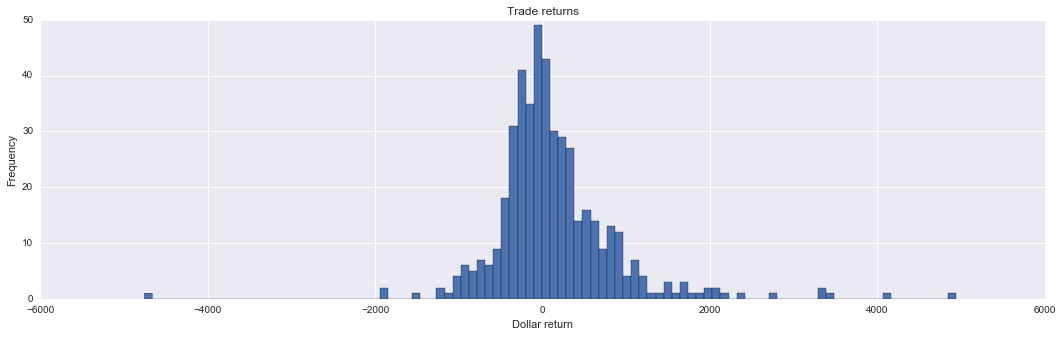

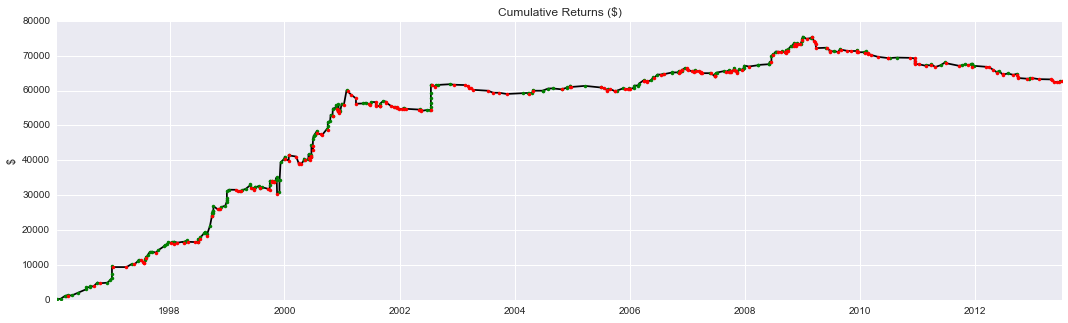

In [14]:
strategy = 0
fixed_trade_amount = 10000
timing = False
close_offset=0
t_cost = 0.0010
file_name = 'TradeLogs/Strategy0_19962013.txt'
results_0 = run_trading_strategy(data, strategy=strategy, timing=timing, t_cost=t_cost, log_file=file_name, close_offset=close_offset)

## Strategy 2
Next we tested a pairs trading strategy on a subset of the announcements where the changes were not due to a merger or takeover, i.e. cases where the stock leaving the index is tradable around the announcement.  

Strategy: Long the stock entering the index and short the stock leaving the index from announcement to change date.

Goal: Take advantage of abnormal excess returns of both stocks entering (positive) and leaving (negative) the index.

Details: Open trade on the morning after the announcement is made. Short the stock leaving the index and use proceeds to go long the stock entering the index. Close trade at close of trading on the effective change date (close long position then exit short).

Results: This strategy is more profitable on average than the previous one and the return distribution is also very positively skewed. Both legs of the trade are profitable on average but trading the stocks leaving the index is much more profitable. Intuatively this makes sense since if a stock is being removed from the index it is more than likely that it has been underperforming in recent times and therefore that it's stock price has a negative momentum. The cumulative return profile is simlar to the profile of the previous strategy, very profitable until the early 2000's then it levels out until the crisis. During the crisis it was again pretty profitable and the momentum arguement applies again there. The stocks leaving the index during the crisis were most likely having big troubles due to the state of the markets and the economy. After the crisis the strategy has been pretty useless and has performed negatively if anything.

Trades: 174 - Winning: 104 - Losing: 70
Long  Leg Returns   Mean:  59.69   Stdev: 777.57   Max: 5103.50   Min: -2115.00
Short Leg Returns   Mean: 381.19   Stdev: 1037.80   Max: 6200.00   Min: -2822.82
Total Returns:      Mean: 421.35   Stdev: 1255.60   Max: 5843.03   Min: -2511.43
Cumulative Returns: 73314.43 - Cumulative Transaction Costs: 6892.52


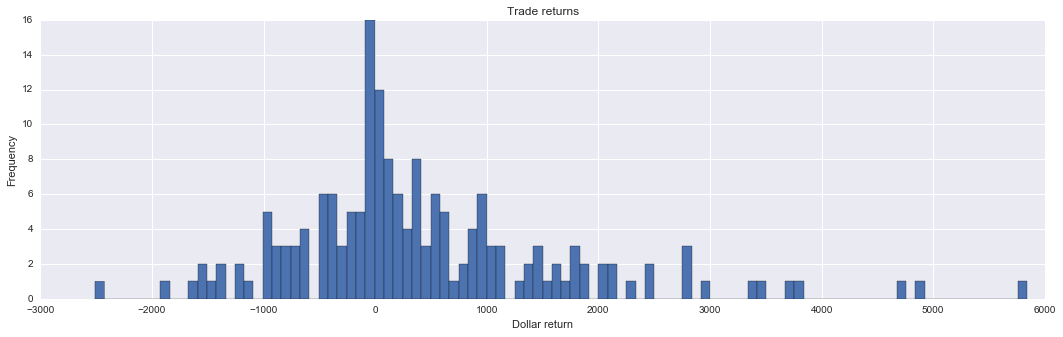

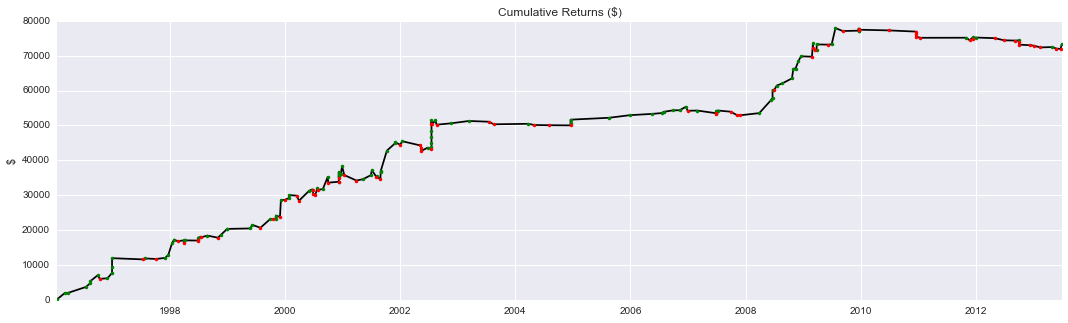

In [15]:
strategy = 1
fixed_trade_amount = 10000
timing = False
close_offset=0
t_cost = 0.0010
file_name = 'TradeLogs/Strategy1_19962013.txt'
results_1 = run_trading_strategy(data, strategy=strategy, timing=timing, t_cost=t_cost, log_file=file_name, close_offset=close_offset)

## Final Strategy
Finally since both approaches were profitable on average and since the pair trading scheme performed better we set up a strategy that combined the two strategies. We trade on all index change announcements, if the change is not forced, i.e. not due to a merger or take-over, we pair trade the stocks entering and leaving the index. But if the change is due to a merger or take-over we only trade the stock entering the index against the S&P500 index.

Strategy: Long the stock entering the index and short the stock leaving the index or the S&P500 index (depending on if the change is due to a take-over or not) from announcement to change date.

Goal: Take advantage of abnormal excess returns of stocks entering (positive) and leaving (negative) the index when possible, otherwise take advantage of stocks entering the index only.


Details: Open trade on the morning after the announcement is made. Short the stock leaving the index or the index itself through the SPY ETF and use proceeds to go long the stock entering the index. Close trade at close of trading on the effective change date.

Results: This strategy is the most profitable out of the three, as is expected it has a lower average return than the isolated pair trading scheme but it has three times as many trading opportunities so running this strategy from the beginning of 1996 to August 2013 results in the highest cumulative return. Cumulative return profile same as pair trading scheme and the return distribution is still positively skewed.

Trades: 463 - Winning: 252 - Losing: 211
Long  Leg Returns   Mean: 132.84   Stdev: 791.54   Max: 5103.50   Min: -4320.00
Short Leg Returns   Mean: 137.77   Stdev: 690.64   Max: 6200.00   Min: -2822.82
Total Returns:      Mean: 250.76   Stdev: 976.68   Max: 5843.03   Min: -4760.09
Cumulative Returns: 116101.50 - Cumulative Transaction Costs: 18438.70


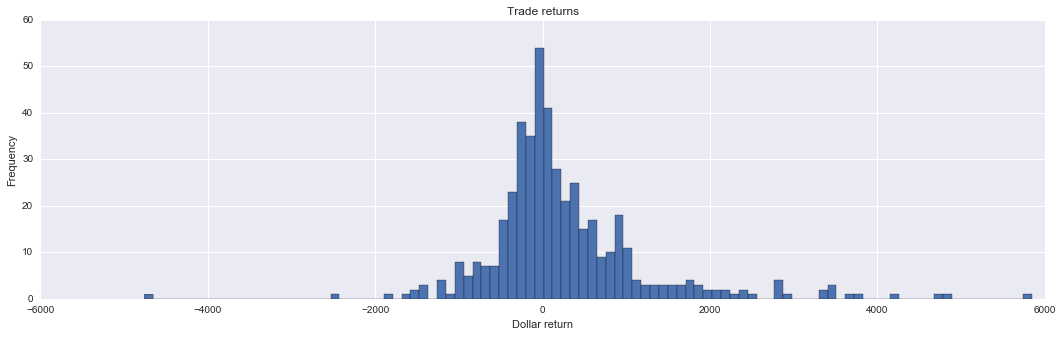

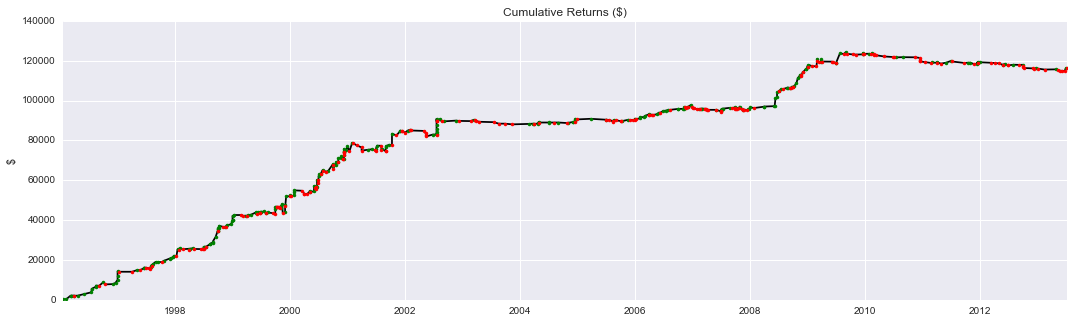

In [16]:
strategy = 2
fixed_trade_amount = 10000
timing = False
t_cost = 0.0010
close_offset=0
file_name = 'TradeLogs/Strategy2_19962013.txt'
results_2 = run_trading_strategy(data, strategy=strategy, timing=timing, t_cost=t_cost, close_offset=close_offset, log_file=file_name)

# Variations
## Closing the positions, timing
We tested variations of when to close the trade 5 days before effective to 5 days after the effective change date. It turns out that it is actually slightly more profitable, during the period that we looked at, to close the position one day after the actual change date (If we are trading the stock that is exiting the index). This agrees with the plot of the average movement we saw earlier. However, that effect if mainly from 1996 until the early 2000's and it looks like there was on average a one day delay in the reaction to the stock removal.

Trades: 463 - Winning: 249 - Losing: 214
Long  Leg Returns   Mean:  59.27   Stdev: 823.81   Max: 4942.49   Min: -4288.00
Short Leg Returns   Mean: 237.34   Stdev: 1199.79   Max: 9636.19   Min: -3915.83
Total Returns:      Mean: 276.93   Stdev: 1413.29   Max: 10734.98   Min: -4815.00
Cumulative Returns: 128219.09 - Cumulative Transaction Costs: 18358.53


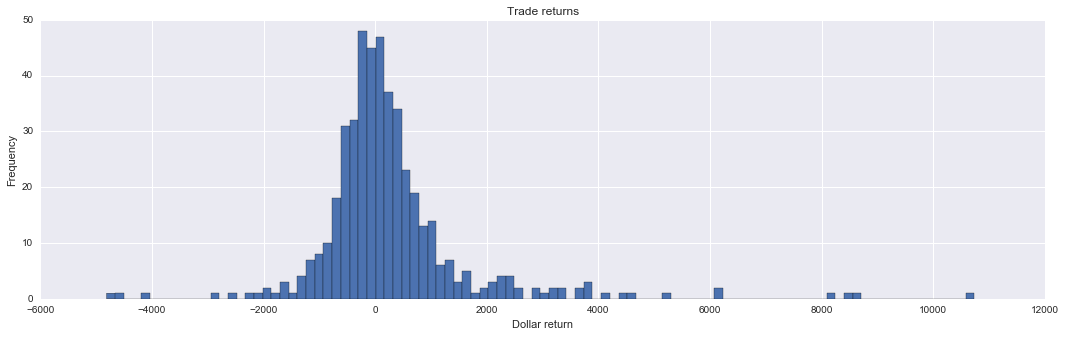

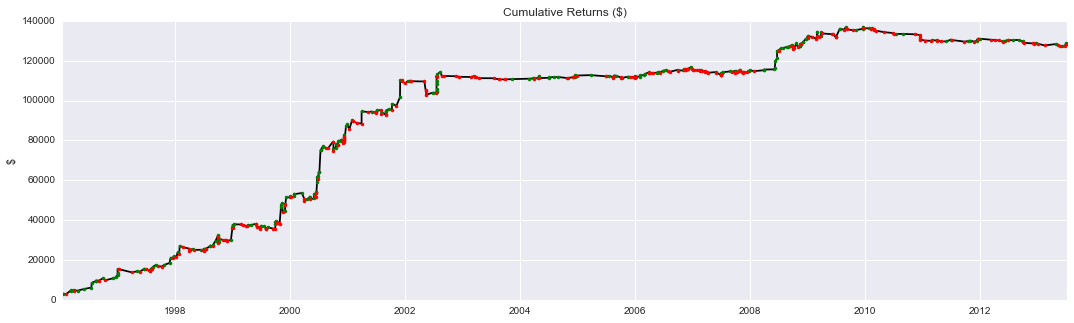

In [17]:
strategy = 2
fixed_trade_amount = 10000
timing = False
t_cost = 0.0010
close_offset=1
file_name = 'TradeLogs/Strategy2_19962013_ExitDelay.txt'
results_2 = run_trading_strategy(data, strategy=strategy, timing=timing, t_cost=t_cost, close_offset=close_offset, log_file=file_name)

## Opening the positions, optimal (impossble) timing
We evaluated the final strategy if one could open the trade immediately after the announcement, so during after hours trading on the announcement date. Which in reality is impossible but the results are interesting, almost 80% of the trades are profitable and the strategy remains somewhat profitable throughout the whole period of interest. Incredibly profitable from 1996 to until the early 2000's, after that the performance really slows down but doesn't turn negative as before. This is just done out of curiosity, but it does tell us that the effect is still there and there are opportunities to profit but it is hard to capture, especially in more recent times. 

Trades: 463 - Winning: 361 - Losing: 102
Long  Leg Returns   Mean: 459.83   Stdev: 966.14   Max: 6190.82   Min: -3679.00
Short Leg Returns   Mean: 334.48   Stdev: 1263.72   Max: 9636.19   Min: -3063.97
Total Returns:      Mean: 774.34   Stdev: 1531.12   Max: 10734.98   Min: -4539.15
Cumulative Returns: 358518.01 - Cumulative Transaction Costs: 18498.28


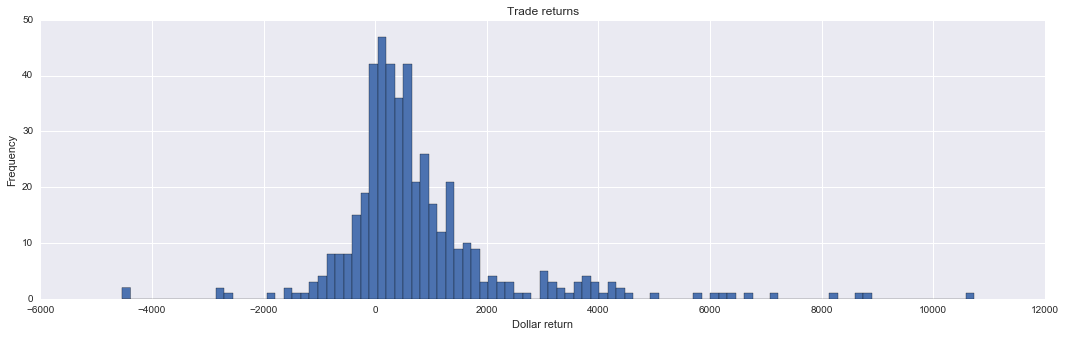

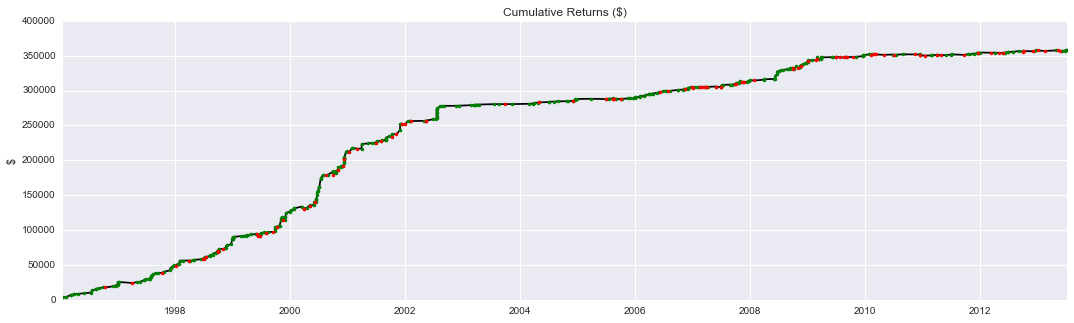

In [18]:
strategy = 2
fixed_trade_amount = 10000
timing = True
t_cost = 0.0010
close_offset=1
file_name = 'TradeLogs/Strategy2_19962013_OptimalTiming.txt'
results = run_trading_strategy(data, strategy=strategy, timing=timing, t_cost=t_cost, close_offset=close_offset, log_file=file_name)

# Extensions
## Anticipating index changes
With the previous example in mind one could hope to take advantage of this phenomenon by anticipating index changes. You could monitor the criteria that the S&P500 index committee uses to evaluate eligble companies (which public information) for a selection of stocks and react to cases where the probability that a stock will be selected for additition or deletion from the index is high. Example: If a stock is likely to be removed from the index then identify the stock that is most likely to replace it and go long that stock and short the stock in the index. With some pre-determined hyperparameters (stop-loss, maximum duration of trade, etc.)

## Other indexes
The S&P500 index is the index that is mostly widely tracked by passive funds and investors. Even though the profitability of the dispersion strategy is pretty low in recent times there could exist opportunities for indexes. For example the Russell indexes or sector based indexes;.